In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# Imports
import os
import pandas as pd
from oma_tracking.oma_clustering import ModeClusterer
import datetime

In [8]:
PROJECT_PATH = os.path.dirname(os.getcwd())

data_path = os.path.join(PROJECT_PATH, 'data', 'Elia', 'OMA_7.parquet') # Change to local data path
start = datetime.datetime(2022, 4, 2)
stop = datetime.datetime(2022, 4, 8)

oma_data = pd.read_parquet(data_path)[start:stop]
sensor = 'mpe_MO_04_ACC5_Z'
sensor_data = pd.DataFrame.from_records(oma_data[sensor].explode().dropna().tolist()).set_index(oma_data[sensor].explode().dropna().index)

C:\Users\Max\AppData\Local\Temp\ipykernel_15872\3962238024.py:7: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  oma_data = pd.read_parquet(data_path)[start:stop]


In [9]:
mc = ModeClusterer(
    eps = 5,
    min_samples = 100,
    freq_multiplier = 40,
    damping_multiplier = 1,
    size_multiplier = 0.5,
    index_divider = 20000,
    cols = ['frequency', 'size', 'damping'],
    min_modal_size = 5,
    max_modal_damping = 5,)

In [10]:
mc.fit(sensor_data)

In [11]:
clustered_modes = mc.predict(min_cluster_size=350)
len(clustered_modes.labels.unique())

18

Text(0, 0.5, 'Frequency (Hz)')

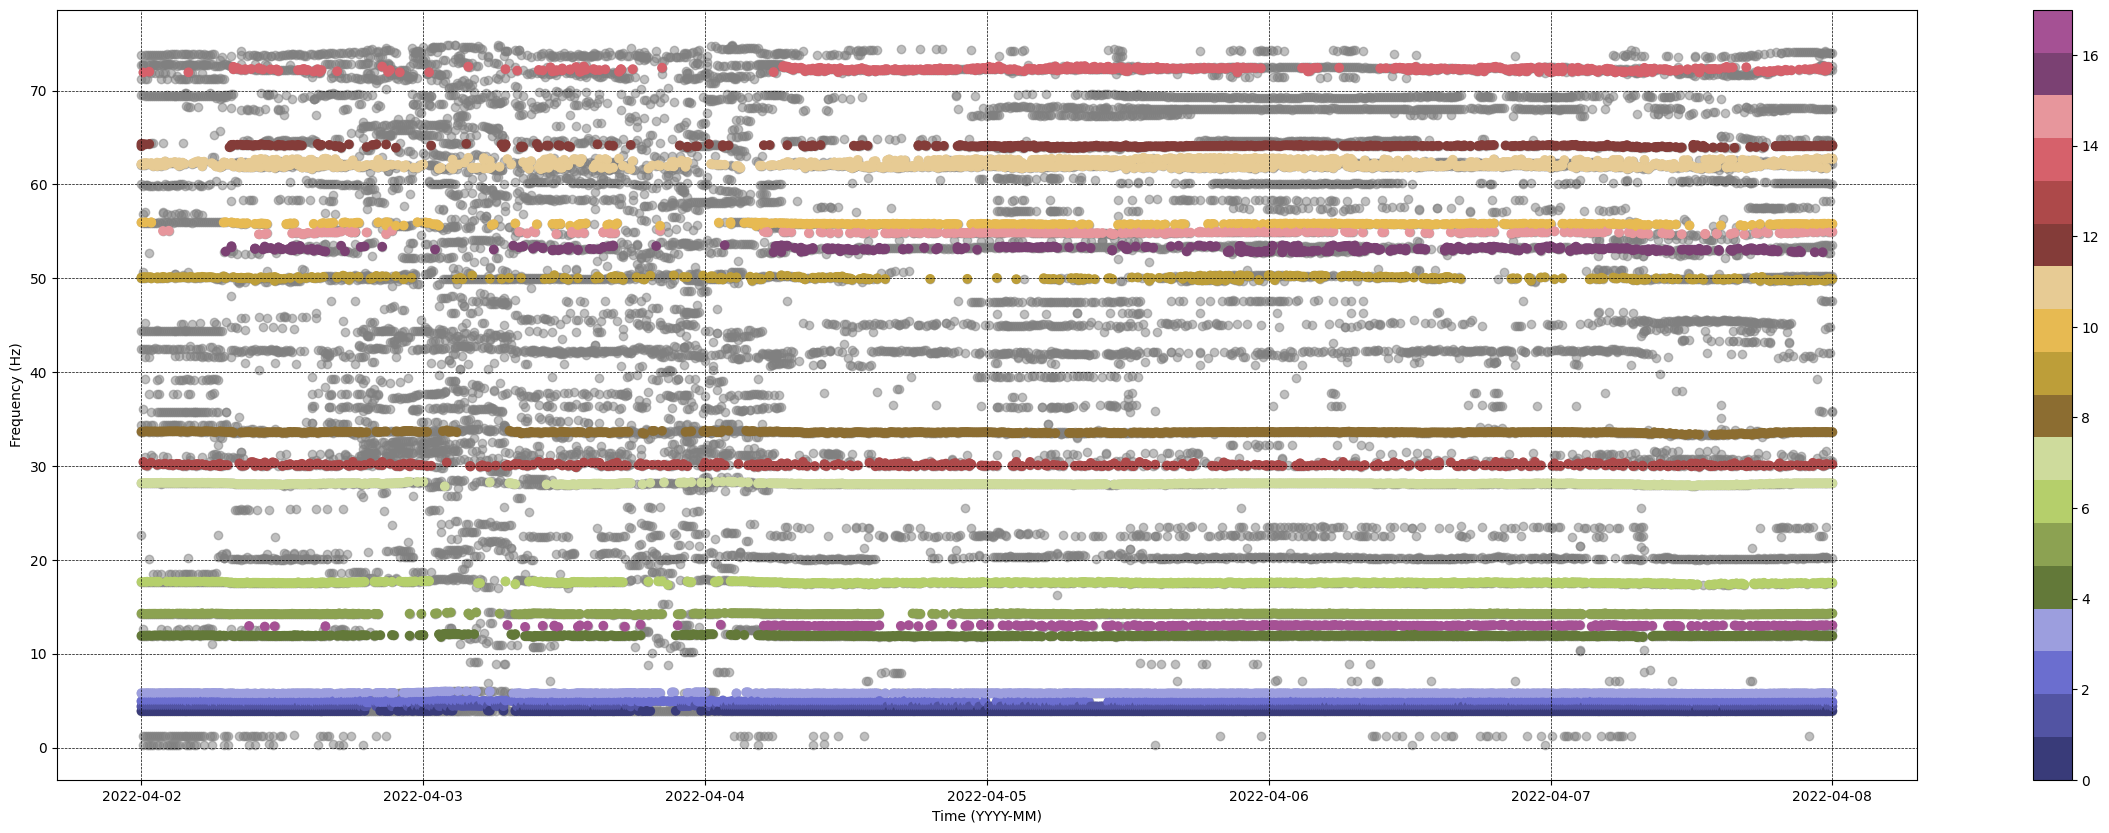

In [12]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

fig = plt.figure(figsize = (30,10))
plt.scatter(sensor_data.index, sensor_data['frequency'], alpha=0.5, color='grey')

tab10 = plt.get_cmap('tab20b')
first_colors = tab10(range(0,len(clustered_modes.labels.unique()),1))
cmap = ListedColormap(first_colors)

plt.scatter(clustered_modes.index, clustered_modes['frequency'], c=clustered_modes['labels'], cmap = cmap)
plt.grid(True, color='k', linestyle='--', linewidth=0.5)
cbar = plt.colorbar()
plt.xlabel('Time (YYYY-MM)')
plt.ylabel('Frequency (Hz)')
#plt.title('Tracked modes in the Z (SS) direction')

In [13]:
clustered_modes.to_parquet(os.path.join(PROJECT_PATH, 'data', 'Elia', 'clustered_modes.parquet'))

(27.0, 28.5)

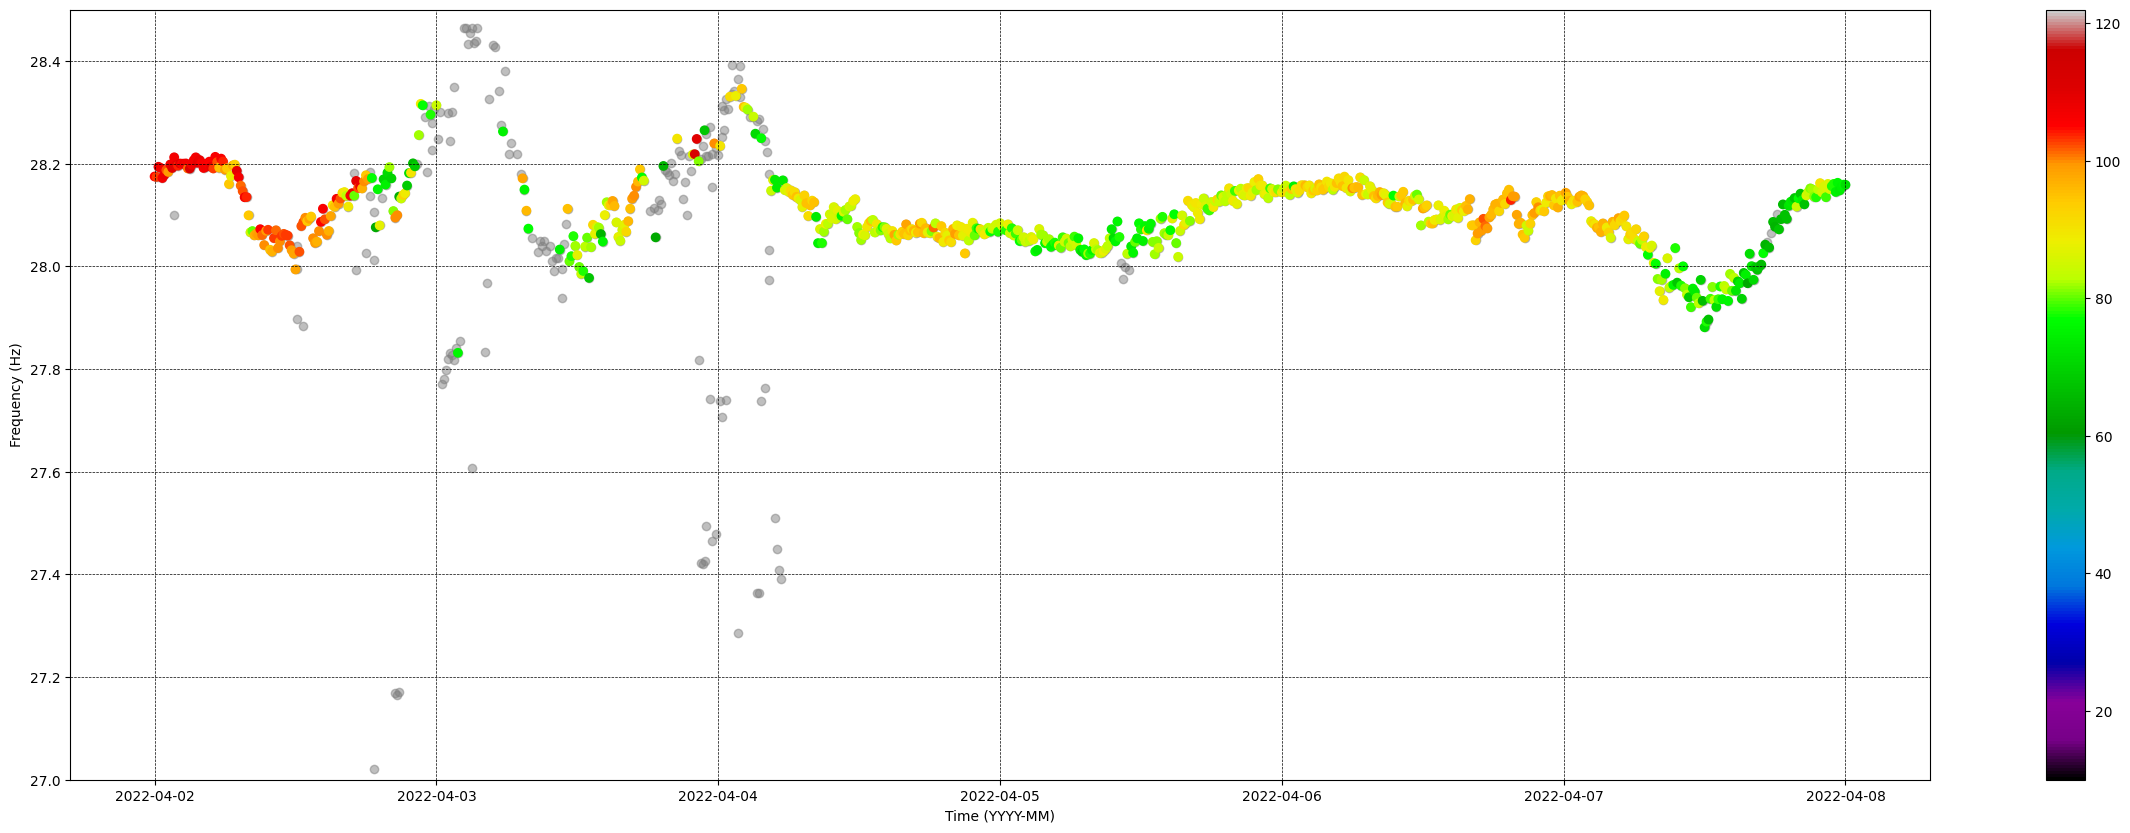

In [14]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

fig = plt.figure(figsize = (30,10))
plt.scatter(sensor_data.index, sensor_data['frequency'], alpha=0.5, color='grey')

tab10 = plt.get_cmap('tab20b')
first_colors = tab10(range(0,len(clustered_modes.labels.unique()),1))
cmap = ListedColormap(first_colors)

plt.scatter(clustered_modes.index, clustered_modes['frequency'], c=clustered_modes['size'], cmap = 'nipy_spectral')
plt.grid(True, color='k', linestyle='--', linewidth=0.5)
cbar = plt.colorbar()
plt.xlabel('Time (YYYY-MM)')
plt.ylabel('Frequency (Hz)')
plt.ylim(27,28.5)
#plt.title('Tracked modes in the Z (SS) direction')

C:\Users\Max\AppData\Local\Temp\ipykernel_15872\4267674406.py:7: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  oma_data = pd.read_parquet(data_path)[start:stop]


(26.0, 35.0)

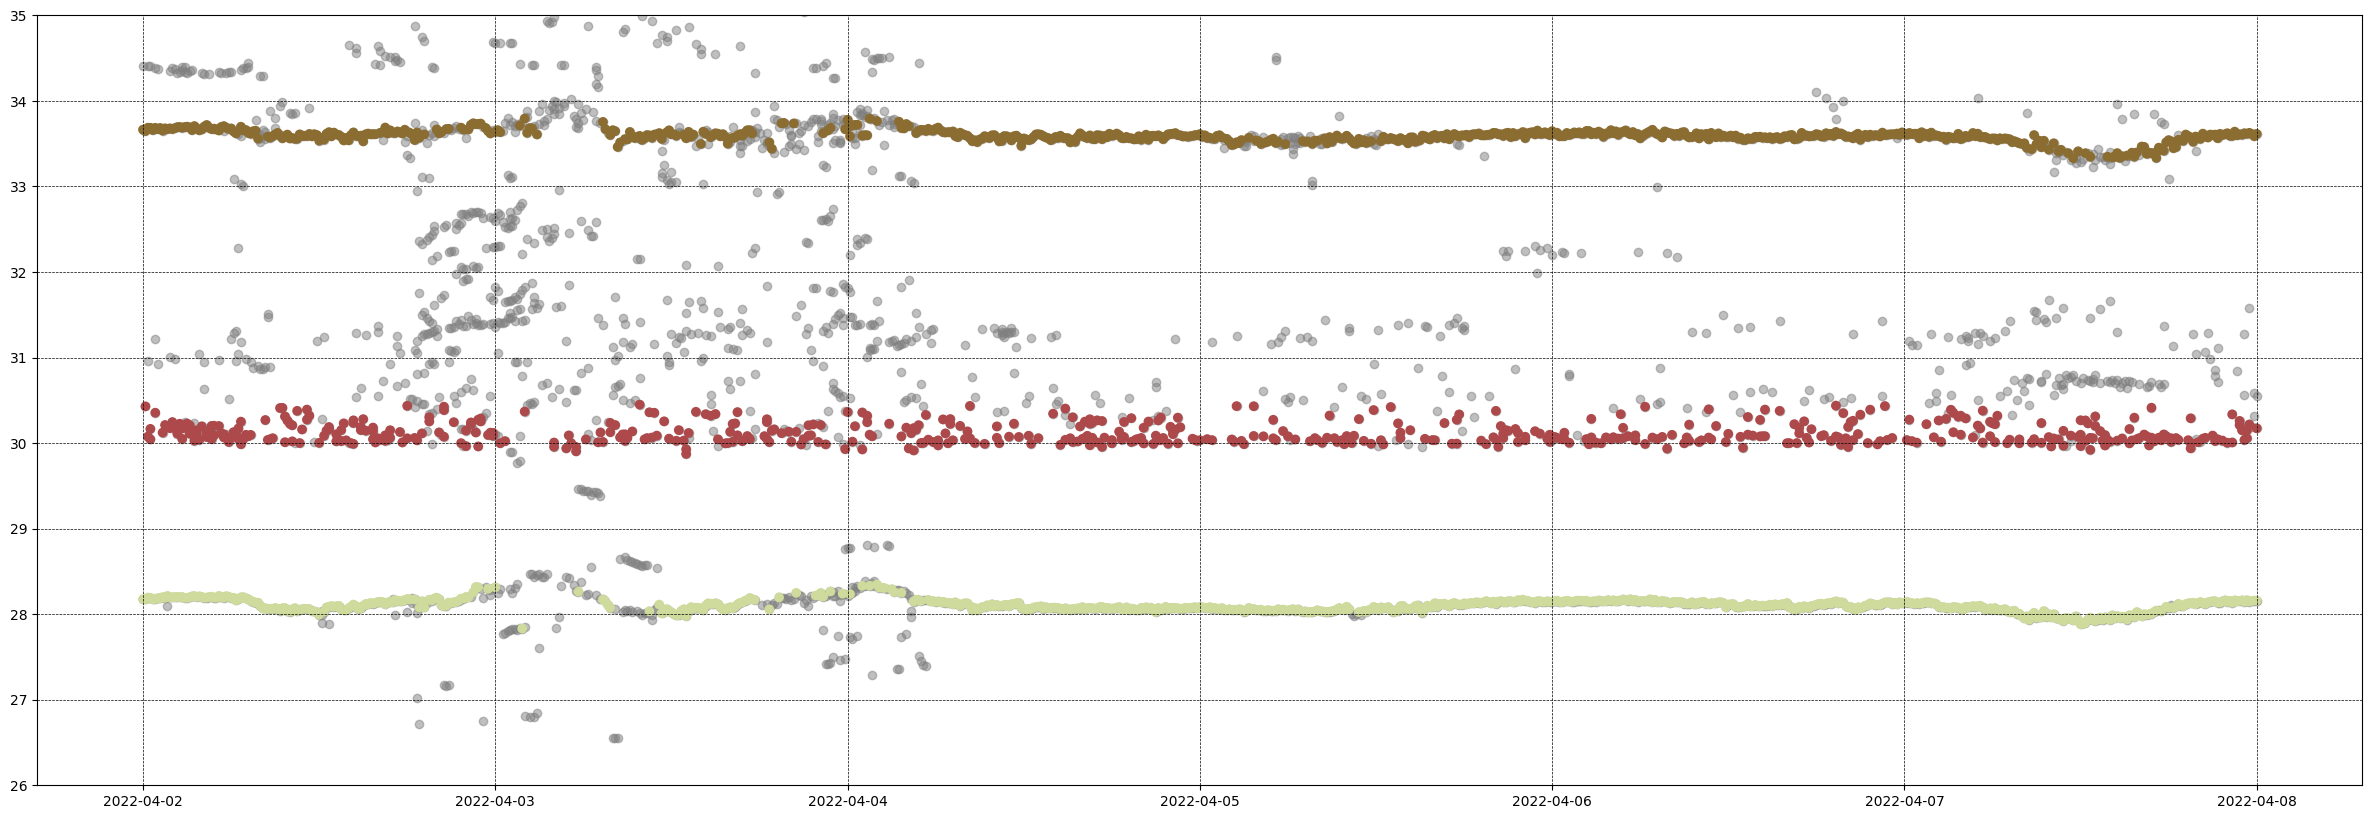

In [15]:
PROJECT_PATH = os.path.dirname(os.getcwd())

data_path = os.path.join(PROJECT_PATH, 'data', 'Elia', 'OMA_7.parquet') # Change to local data path
start = datetime.datetime(2022, 4, 2)
stop = datetime.datetime(2022, 4, 8)

oma_data = pd.read_parquet(data_path)[start:stop]
sensor = 'mpe_MO_04_ACC5_Z'
sensor_data = pd.DataFrame.from_records(oma_data[sensor].explode().dropna().tolist()).set_index(oma_data[sensor].explode().index)

mc = ModeClusterer(
    eps = 5,
    min_samples = 100,
    freq_multiplier = 40,
    damping_multiplier = 1,
    size_multiplier = 0.5,
    index_divider = 20000,
    cols = ['frequency', 'size', 'damping'],
    min_modal_size = 5,
    max_modal_damping = 5,)

mc.fit(sensor_data)
clustered_modes = mc.predict(min_cluster_size=350)

fig = plt.figure(figsize = (30,10))
plt.scatter(sensor_data.index, sensor_data['frequency'], alpha=0.5, color='grey')

tab10 = plt.get_cmap('tab20b')
first_colors = tab10(range(0,len(clustered_modes.labels.unique()),1))
cmap = ListedColormap(first_colors)

plt.scatter(clustered_modes.index, clustered_modes['frequency'], c=clustered_modes['labels'], cmap = cmap)
plt.grid(True, color='k', linestyle='--', linewidth=0.5)
plt.ylim(26,35)

In [16]:
PROJECT_PATH = os.path.dirname(os.getcwd())

data_path = os.path.join(PROJECT_PATH, 'data', 'Elia', 'OMA_7.parquet') # Change to local data path
start = datetime.datetime(2022, 4, 2)
stop = datetime.datetime(2022, 4, 8)

oma_data = pd.read_parquet(data_path)[start:stop]
sensor = 'mpe_MO_04_ACC4_Z'
sensor_data = pd.DataFrame.from_records(oma_data[sensor].explode().dropna().tolist()).set_index(oma_data[sensor].explode().index)

mc = ModeClusterer(
    eps = 5,
    min_samples = 100,
    freq_multiplier = 40,
    damping_multiplier = 1,
    size_multiplier = 0.5,
    index_divider = 20000,
    cols = ['frequency', 'size', 'damping'],
    min_modal_size = 5,
    max_modal_damping = 5,)

mc.fit(sensor_data)
clustered_modes = mc.predict(min_cluster_size=350)



C:\Users\Max\AppData\Local\Temp\ipykernel_15872\3176146900.py:7: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  oma_data = pd.read_parquet(data_path)[start:stop]


(26.0, 28.5)

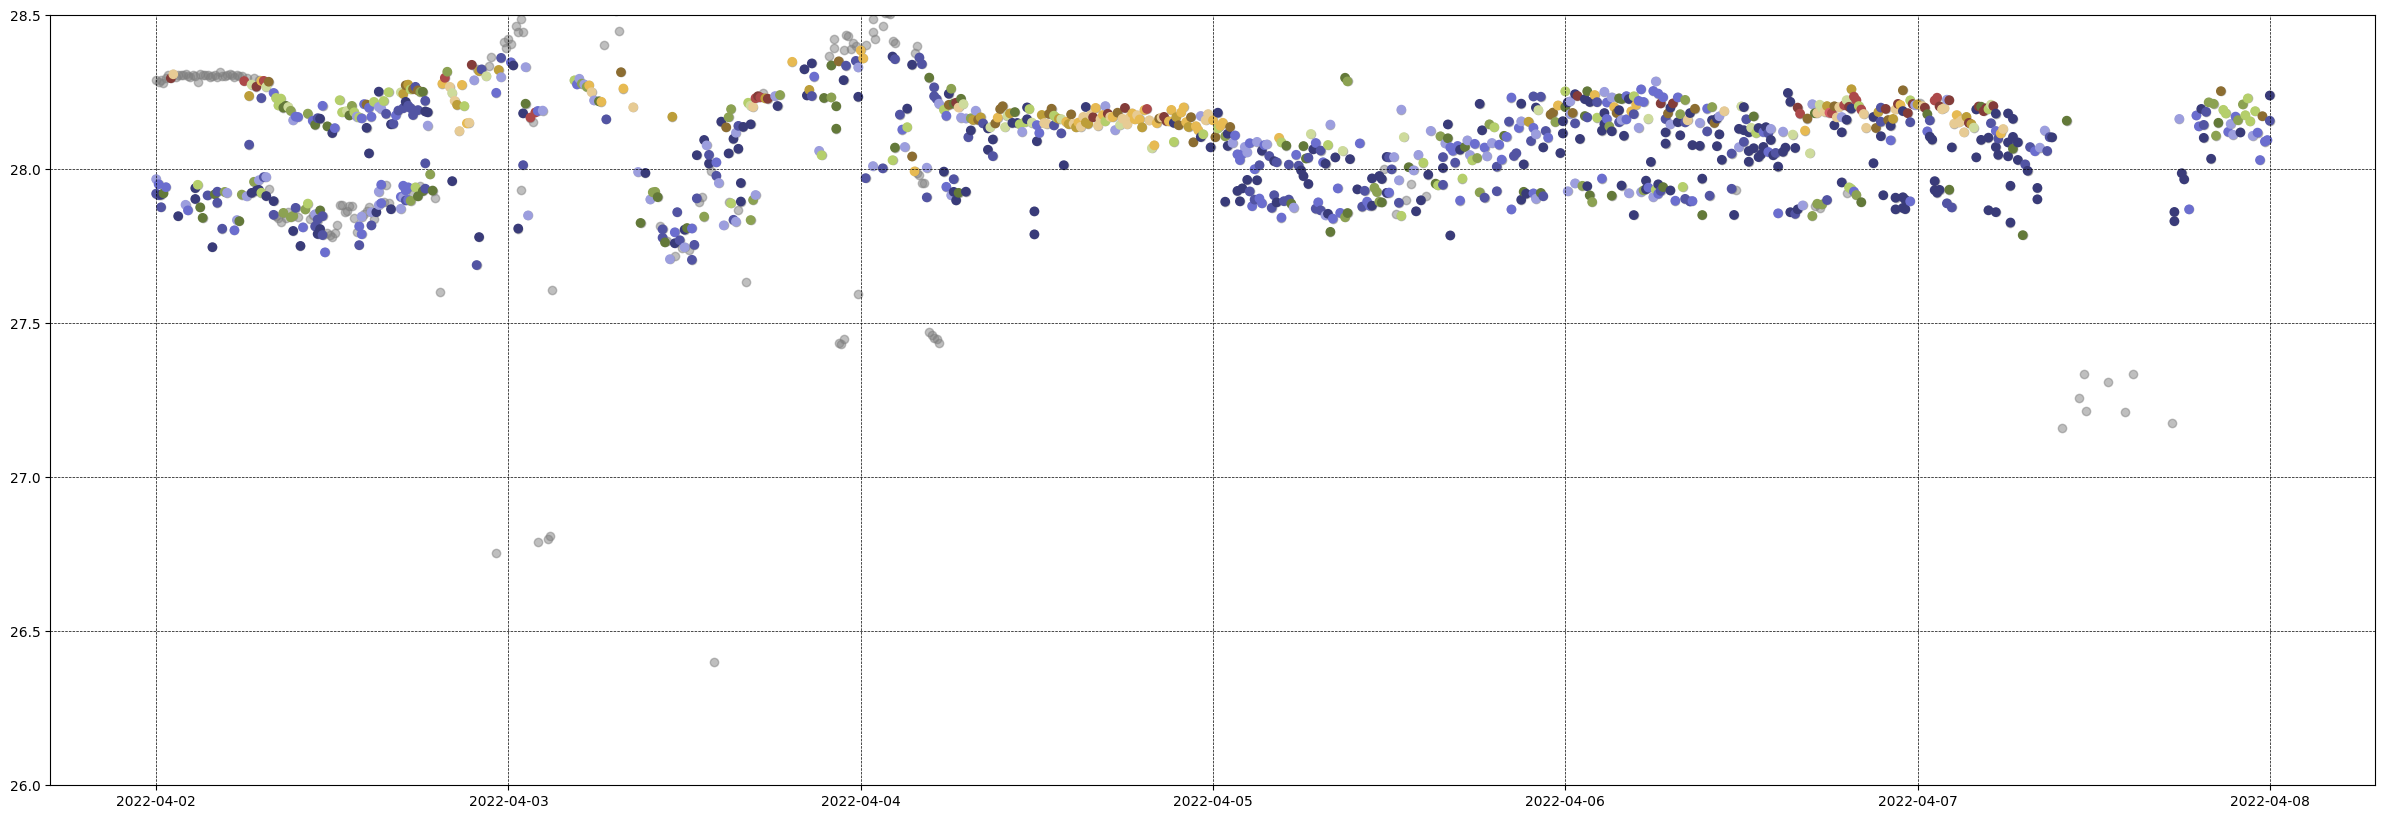

In [17]:
fig = plt.figure(figsize = (30,10))
plt.scatter(sensor_data.index, sensor_data['frequency'], alpha=0.5, color='grey')

tab10 = plt.get_cmap('tab20b')
first_colors = tab10(range(0,len(clustered_modes.labels.unique()),1))
cmap = ListedColormap(first_colors)

plt.scatter(clustered_modes.index, clustered_modes['frequency'], c=clustered_modes['size'], cmap = cmap)
plt.grid(True, color='k', linestyle='--', linewidth=0.5)
plt.ylim(26,28.5)